In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter

import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

import pandas as pd

In [ ]:
train_loc = '/content/drive/MyDrive/binary/output3/output3/train'
test_loc = '/content/drive/MyDrive/binary/output3/output3/val'

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_loc, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_loc, target_size=(224,224))

Found 5546 images belonging to 2 classes.
Found 1383 images belonging to 2 classes.


In [ ]:
diagnosis_csv = '/content/drive/MyDrive/binary/output3/output3/patient_diagnosis_binary.csv'
diagnosis = pd.read_csv(diagnosis_csv, names=['pId', 'diagnosis'])
diagnosis.head()

,pId,diagnosis
0,101,Unhealthy
1,102,Healthy
2,103,Unhealthy
3,104,Unhealthy
4,105,Unhealthy


In [ ]:
categories = diagnosis['diagnosis'].unique()
categories

array(['Unhealthy', 'Healthy'], dtype=object)

In [ ]:
from tensorflow.keras.applications import efficientnet as efn

In [ ]:
height = 224
width = 224
channels = 3
n_classes = 2
input_shape = (height, width, channels)

In [ ]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam


In [ ]:
efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape, classes=n_classes)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

16705208/16705208 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import cv2
import albumentations as albu
from skimage.transform import resize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

In [ ]:
optimizer = Adam(lr=0.0001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_learning_rate= 1e-6, verbose=1)
#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','mae'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_history = model.fit_generator(traindata, validation_data = testdata, callbacks = [early_stop, rlrop],verbose = 2, epochs = 10)

#saving the trained model weights as data file in .h5 format
model.save_weights("binary_efficientnetb0_weights.h5")

<ipython-input-21-f3106d55f737>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(traindata, validation_data = testdata, callbacks = [early_stop, rlrop],verbose = 2, epochs = 10)


Epoch 1/10
174/174 - 93s - loss: 0.1188 - accuracy: 0.9529 - mae: 0.0736 - val_loss: 0.1166 - val_accuracy: 0.9530 - val_mae: 0.0752 - lr: 1.0000e-04 - 93s/epoch - 536ms/step
Epoch 2/10
174/174 - 85s - loss: 0.1165 - accuracy: 0.9526 - mae: 0.0728 - val_loss: 0.1253 - val_accuracy: 0.9494 - val_mae: 0.0882 - lr: 1.0000e-04 - 85s/epoch - 486ms/step
Epoch 3/10
174/174 - 82s - loss: 0.1091 - accuracy: 0.9535 - mae: 0.0693 - val_loss: 0.1249 - val_accuracy: 0.9508 - val_mae: 0.0753 - lr: 1.0000e-04 - 82s/epoch - 473ms/step
Epoch 4/10
174/174 - 82s - loss: 0.1018 - accuracy: 0.9540 - mae: 0.0646 - val_loss: 0.1244 - val_accuracy: 0.9494 - val_mae: 0.0805 - lr: 1.0000e-04 - 82s/epoch - 471ms/step
Epoch 5/10
174/174 - 79s - loss: 0.0926 - accuracy: 0.9583 - mae: 0.0594 - val_loss: 0.1376 - val_accuracy: 0.9429 - val_mae: 0.0727 - lr: 1.0000e-04 - 79s/epoch - 457ms/step
Epoch 6/10

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
174/174 - 86s - loss: 0.0910 - accura

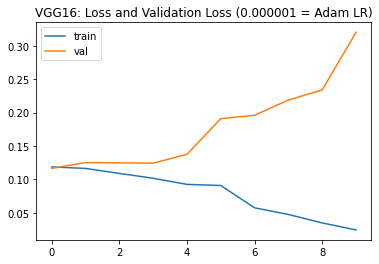

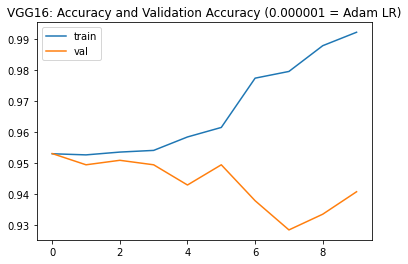

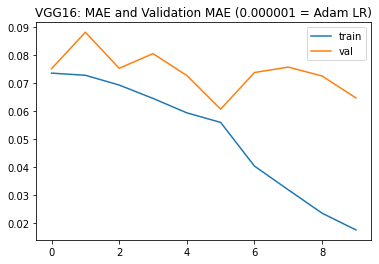

In [ ]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='val')
plt.title('VGG16: Loss and Validation Loss (0.000001 = Adam LR)')
plt.legend();
plt.show()

plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='val')
plt.title('VGG16: Accuracy and Validation Accuracy (0.000001 = Adam LR)')
plt.legend();
plt.show()

plt.plot(model_history.history['mae'], label='train')
plt.plot(model_history.history['val_mae'], label='val')
plt.title('VGG16: MAE and Validation MAE (0.000001 = Adam LR)')
plt.legend();
plt.show()

In [ ]:
model.evaluate(testdata)

44/44 [==============================] - 15s 344ms/step - loss: 0.3201 - accuracy: 0.9407 - mae: 0.0647


[0.32013487815856934, 0.940708577632904, 0.06472384184598923]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
val_predict = model.predict(testdata)

44/44 [==============================] - 14s 312ms/step


In [ ]:
import numpy as np
predict_class = np.argmax(val_predict, axis=1)
predict_class = predict_class.tolist()

In [1]:
labels = ['Healthy','Unhealthy']
report = classification_report(testdata.classes, predict_class, target_names=labels)
print(report)

NameError: ignored

In [ ]:
cm = confusion_matrix(testdata.classes, predict_class)
cm_df = pd.DataFrame(cm,
                     index = ['Healthy','Unhealthy'], 
                     columns = ['Healthy','Unhealthy'])

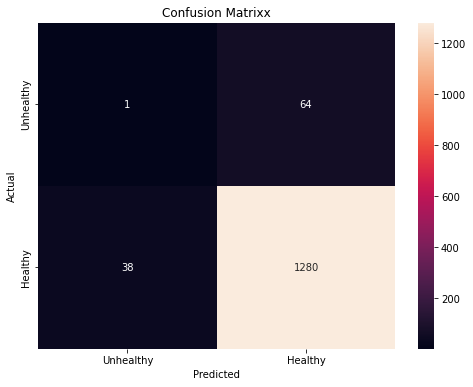

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title("Confusion Matrixx")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()